In [ ]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda


# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
input_img = Input(shape=(3072,))  # 32x32x3 = 3072
encoded = Dense(1000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)

decoded = Dense(1000, activation='relu')(encoded)
decoded = Dense(3072, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

#  encoder
encoder = Model(input_img, encoded)

#  decoder
decoder_input = Input(shape=(500,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
196/196 [==============================] - 5s 12ms/step - loss: 0.0337 - val_loss: 0.0222
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0184 - val_loss: 0.0157
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0144 - val_loss: 0.0135
Epoch 4/10
196/196 [==============================] - 2s 11ms/step - loss: 0.0126 - val_loss: 0.0119
Epoch 5/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 6/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 8/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 9/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


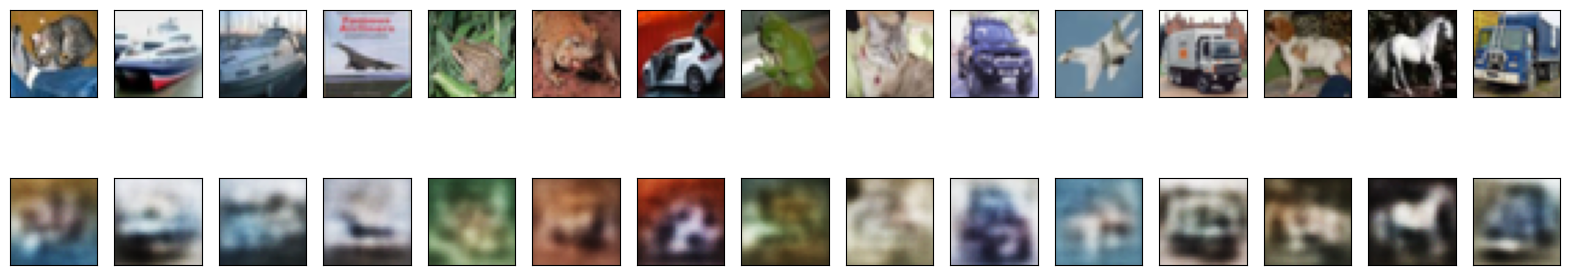

In [ ]:
# Display original and reconstructed images

n = 15 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


code size=500


In [ ]:

# The encoder
encoder = Sequential()
encoder.add(InputLayer(x_train[0].shape))
encoder.add(Dense(500, activation='relu'))

# The decoder
decoder = Sequential()
decoder.add(InputLayer((500,)))
decoder.add(Dense(3072, activation='sigmoid'))

inp=Input(x_train[0].shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=10,batch_size=256, validation_data=[x_test, x_test])

Epoch 1/10
196/196 [==============================] - 3s 10ms/step - loss: 0.0327 - val_loss: 0.0229
Epoch 2/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0205 - val_loss: 0.0176
Epoch 3/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0170 - val_loss: 0.0151
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 5/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0118 - val_loss: 0.0129
Epoch 7/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 8/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 9/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0093 - val_loss: 0.008

313/313 [==============================] - 0s 1ms/step


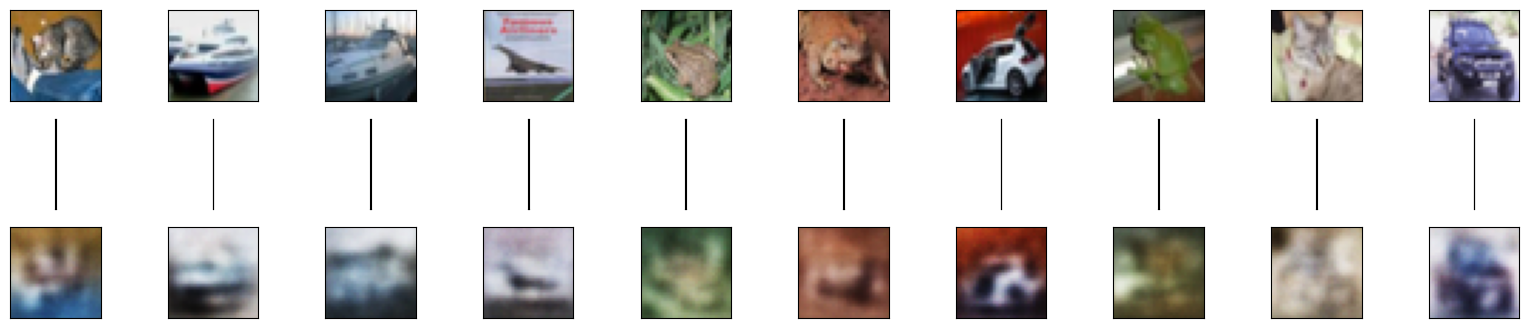

In [ ]:
code= encoder.predict(x_test)
reco = decoder.predict(code)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # coded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(code[i].reshape([code.shape[-1]//2,-1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reco[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

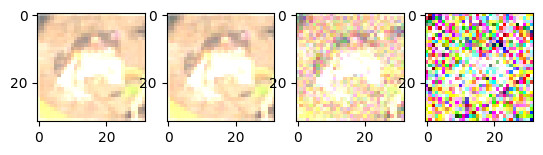

In [ ]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise
plt.subplot(1,4,1)
show_image(x_train[0].reshape(32, 32,3))
plt.subplot(1,4,2)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.01)[0].reshape(32, 32,3))
plt.subplot(1,4,3)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.1)[0].reshape(32, 32,3))
plt.subplot(1,4,4)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.5)[0].reshape(32, 32,3))

In [ ]:
# The encoder
encoder = Sequential()
encoder.add(InputLayer(x_train[0].shape))
encoder.add(Dense(500, activation='relu'))

# The decoder
decoder = Sequential()
decoder.add(InputLayer((500,)))
decoder.add(Dense(3072, activation='sigmoid'))

inp = Input(x_train[0].shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adam', 'mse')

X_train_noise = apply_gaussian_noise(x_train)
X_test_noise = apply_gaussian_noise(x_test)

autoencoder.fit(x=X_train_noise, y=x_train, epochs=10,batch_size=256, validation_data=[X_test_noise, x_test])

Epoch 1/10
196/196 [==============================] - 3s 11ms/step - loss: 0.0322 - val_loss: 0.0238
Epoch 2/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0198 - val_loss: 0.0173
Epoch 3/10
196/196 [==============================] - 1s 8ms/step - loss: 0.0165 - val_loss: 0.0150
Epoch 4/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0142 - val_loss: 0.0157
Epoch 5/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 6/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 7/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0109 - val_loss: 0.0227
Epoch 8/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 9/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 10/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0092 - val_loss: 0.009

313/313 [==============================] - 1s 2ms/step


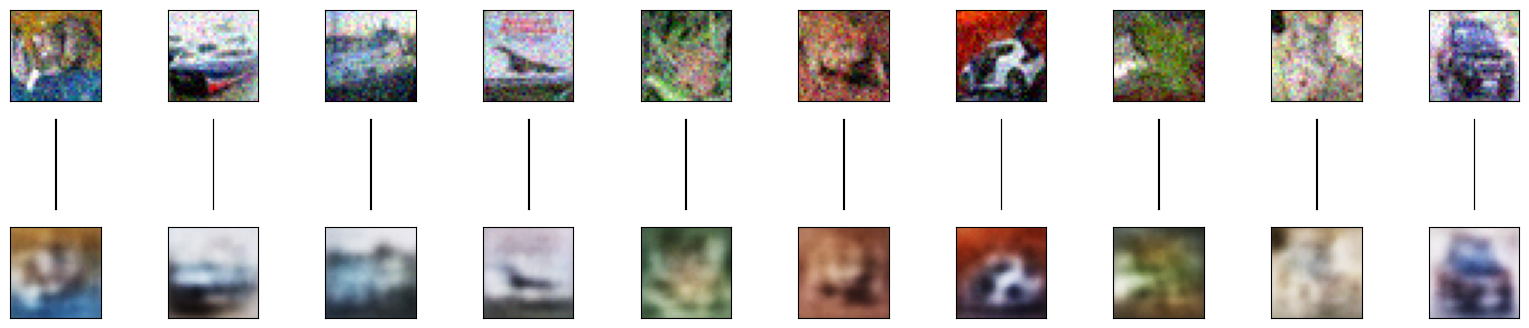

In [ ]:
x_test_noise = apply_gaussian_noise(x_test)
code= encoder.predict(x_test_noise)
reco = decoder.predict(code)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # coded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(code[i].reshape([code.shape[-1]//2,-1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reco[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# The encoder
encoder = Sequential()
encoder.add(InputLayer(x_train[0].shape))
encoder.add(Dense(500, activation='relu'))

# The decoder
decoder = Sequential()
decoder.add(InputLayer((500,)))
decoder.add(Dense(3072, activation='sigmoid'))

inp = Input(x_train[0].shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adam', 'mse')

X_train_noise = apply_gaussian_noise(x_train,1)
X_test_noise = apply_gaussian_noise(x_test,1)

autoencoder.fit(x=X_train_noise, y=x_train, epochs=10,batch_size=256, validation_data=[X_test_noise, x_test])

Epoch 1/10
196/196 [==============================] - 5s 11ms/step - loss: 0.0398 - val_loss: 0.0271
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0242 - val_loss: 0.0240
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0213 - val_loss: 0.0226
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0200 - val_loss: 0.0218
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0192 - val_loss: 0.0218
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0188 - val_loss: 0.0212
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0184 - val_loss: 0.0212
Epoch 8/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0182 - val_loss: 0.0213
Epoch 9/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0179 - val_loss: 0.0211
Epoch 10/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0178 - val_loss: 0.02

313/313 [==============================] - 1s 2ms/step


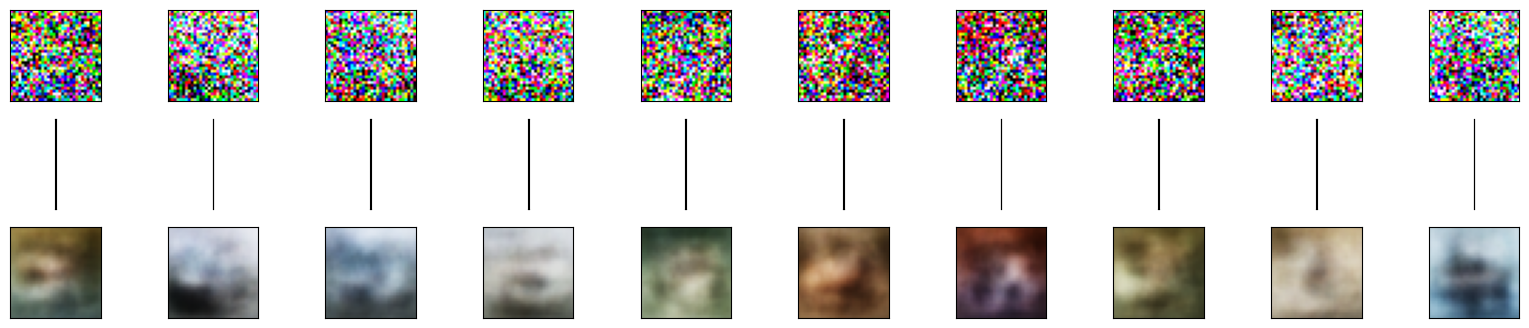

In [ ]:
x_test_noise = apply_gaussian_noise(x_test,1)
code= encoder.predict(x_test_noise)
reco = decoder.predict(code)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # coded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(code[i].reshape([code.shape[-1]//2,-1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reco[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Add Gaussian noise to the encoded representation
def add_noise(x):
    mu, sigma = 0, 0.1
    noise = K.random_normal(shape=K.shape(x), mean=mu, stddev=sigma)
    return x + noise

mu, sigma = 0, 0.1  # Mean and standard deviation
noise = np.random.normal(mu, sigma, x_test.shape)
x_test_noisy = x_test + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# The encoder
encoder = Sequential()
encoder.add(InputLayer(x_train[0].shape))
encoder.add(Dense(500, activation='relu'))
encoder.add(Lambda(add_noise))  # Add noise to the encoded representation


# The decoder
decoder = Sequential()
decoder.add(InputLayer((500,)))
decoder.add(Dense(3072, activation='sigmoid'))

inp = Input(x_train[0].shape)

code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adam', 'mse')


autoencoder.fit(x=x_train, y=x_train, epochs=10,batch_size=256, validation_data=[x_test_noisy, x_test])

Epoch 1/10
196/196 [==============================] - 5s 12ms/step - loss: 0.0335 - val_loss: 0.0245
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0211 - val_loss: 0.0184
Epoch 3/10
196/196 [==============================] - 1s 8ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 6/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 7/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0111 - val_loss: 0.0122
Epoch 8/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 9/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 10/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0097 - val_loss: 0.009

313/313 [==============================] - 0s 1ms/step


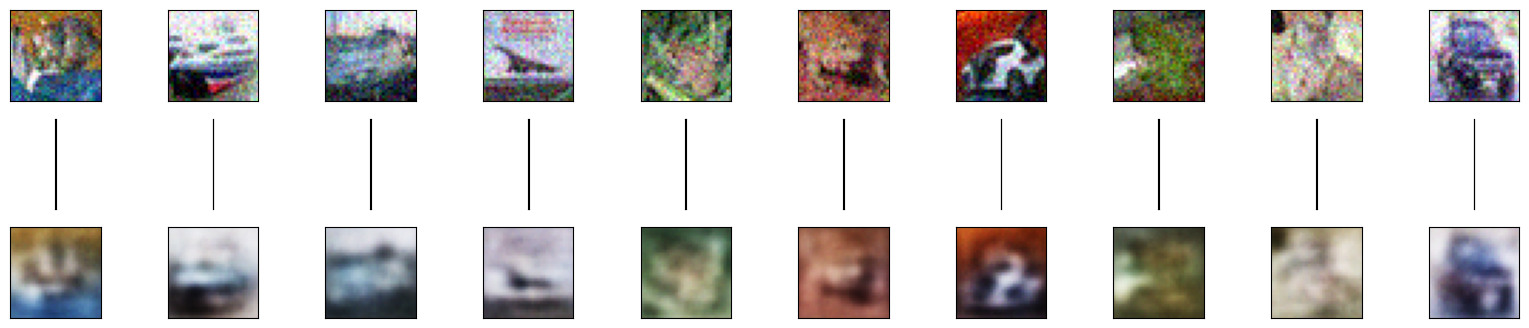

In [ ]:
x_test_noise = apply_gaussian_noise(x_test)
code= encoder.predict(x_test_noise)
reco = decoder.predict(code)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # coded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(code[i].reshape([code.shape[-1]//2,-1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reco[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()